In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statistics
import pandas as pd
from scipy.stats import norm, kstest
from scipy.stats import describe
from scipy.stats import ks_2samp
import math
from statsmodels.tsa.stattools import acf
import scipy.stats as stats 
from matplotlib.legend import Legend
#import rich
from rich import print

In [2]:
pip show rich

Name: rich
Version: 13.3.5
Summary: Render rich text, tables, progress bars, syntax highlighting, markdown and more to the terminal
Home-page: https://github.com/Textualize/rich
Author: Will McGugan
Author-email: willmcgugan@gmail.com
License: MIT
Location: /home/users/earjcas/.local/lib/python3.10/site-packages
Requires: markdown-it-py, pygments
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

In [4]:
def r(ts):
    lag_corr = []
    for i in range(0,len(ts)):
        vals = acf(ts[i])
        print(vals)
        lag_corr.append(vals[1])
        
    return np.mean(lag_corr)
def rtemp(ts):
    return acf(ts)[1]
    
def my_ks_2samp(s1,s2,alpha,r1,r2):
    
    # Gets all observations
    s1 = np.sort(s1)
    s2 = np.sort(s2)
    observations = np.concatenate([s1, s2])

    #generate cdfs
    m,n = len(s1),len(s2) 
    cdf1 = np.searchsorted(s1, observations, side='right')/m
    cdf2 = np.searchsorted(s2, observations, side='right')/n

    #change smaple size to effective samaple size
    meff,neff= ((1-r1)/(1+r1))*m,((1-r2)/(1+r2))*n 
    en = meff * neff / (meff + neff)

    #compute statistic for given confidence interval
    C =np.sqrt(-np.log(alpha/2)*0.5)
    A = C*np.sqrt(1/en)

    #take difference between cdfs
    cddiffs = cdf1 - cdf2
    argminS = np.argmin(cddiffs)
    argmaxS = np.argmax(cddiffs)
    
    # Ensure sign of minS is not negative.
    minS = np.clip(-cddiffs[argminS], 0, 1)
    maxS = cddiffs[argmaxS]

    if  minS > maxS:
        d = minS
    else:
        d = maxS

    p_value = stats.kstwo.sf(d, np.round(en))
    return {"statistic": d, "pvalue" : p_value, "c_value": A}

In [26]:
variable = 'Umass'
modelname = 'ACCESS-ESM1-5'


if(variable=='phibar'):
    binvals=np.arange(25,76,1) 
    units='[deg N]'
if(variable=='alpha'):
    binvals=np.arange(-60,60,2)
    units='[deg]'
if(variable=='Umean'):
    binvals=np.arange(7.5,22.5,0.6)
    units='[m/s]'
if(variable=='Umass'):
    binvals=np.arange(0,3,0.05)
    units='[1E14 km^2 m/s]'

if(modelname == 'IPSL-CM6A-LR'):
    nhist=10
    nfut=11
    fv='1'
    lletra= '(a)'
if(modelname == 'UKESM1-0-LL'):
    nhist=20
    nfut=20
    fv='2'
    lletra= '(b)'
if(modelname == 'CNRM-CM6-1'):
    nhist=10
    nfut=7
    fv='2'
    lletra= '(c)'
if(modelname == 'CanESM5'):
   nhist=8
   nfut=8
   fv='1'
   lletra= '(d)'
if(modelname == 'ACCESS-ESM1-5'):
    nhist=9
    nfut=9
    fv='1'
    lletra= '(e)'

{'statistic': 0.05030478845433051, 'pvalue': 0.043181067851459365, 'c_value': 0.0495626353366928}

5.03e-02

4.32e-02

0.8039945554637756 0.7928572419791523

3005.2773119033955

t=-8.080, df=3005, cv=1.645, p=0.000

Reject the null hypothesis that the means are equal. The sample means are different

Reject the null hypothesis that the means are equal. The sample means are different

4.32e-02

,1995-2014,2080-2099
Median,1.086073,1.130735
Mean,1.063306,1.112484
Standard Deviation,0.413429,0.402803
Skweness,-0.093934,-0.136315
"K-S test (statistic, p-value)","5.03e-02, 4.32e-02","5.03e-02, 4.32e-02"


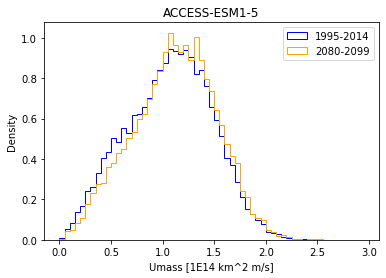

In [27]:
for ens in np.arange(1,nhist,1):
    if(ens == 1):
        data = np.load('/home/users/earjcas/data/diags/'+modelname+'/'+variable+'_'+modelname+'_historical_r'+str(ens)+'i1p1f'+fv+'.npy')
        data = data[np.where(data != 0)]
    else:
        if(modelname =='IPSL-CM6A-LR' and ens == 7): 
            print()    
        else:
            if(modelname =='UKESM1-0-LL' and ens == 13 or ens == 14 or ens ==  15):
                print()
            else:    
                dum = np.load('/home/users/earjcas/data/diags/'+modelname+'/'+variable+'_'+modelname+'_historical_r'+str(ens)+'i1p1f'+fv+'.npy')
                dum = dum[np.where(dum != 0)]
                data = np.concatenate((data,dum))
                
for ens in (np.arange(1,nfut,1)):
        if (ens == 1 and modelname != 'ACCESS-ESM1-5'):
            data2= np.load('/home/users/earjcas/data/diags/'+modelname+'/'+variable+'_'+modelname+'_ssp370_r'+str(ens)+'i1p1f'+fv+'.npy')
            data2 = data2[np.where(data2 !=0)]
        else:
            if(modelname =='IPSL-CM6A-LR' and ens == 7):
                print()
            else:
                if(modelname == 'UKESM1-0-LL' and ens == 13 or ens == 14 or ens == 15):
                    print()  
                else:
                    if(modelname =='ACCESS-ESM1-5' and ens==1):
                        print()
                    else:
                        if(modelname == 'ACCESS-ESM1-5' and ens == 2):
                            data2= np.load('/home/users/earjcas/data/diags/'+modelname+'/'+variable+'_'+modelname+'_ssp370_r'+str(ens)+'i1p1f'+fv+'.npy')
                            data2 = data2[np.where(data2 !=0)]
                        else:
                            dum = np.load('/home/users/earjcas/data/diags/'+modelname+'/'+variable+'_'+modelname+'_ssp370_r'+str(ens)+'i1p1f'+fv+'.npy')
                            dum = dum[np.where(dum != 0)]
                            data2 = np.concatenate((data2,dum))

if(variable=='Umass'):
    data=data/1E14
    data2=data2/1E14

#CALCULATE K-S TEST

r1 = rtemp(data)
r2 = rtemp(data2)

KS = my_ks_2samp(data,data2,0.05,r1,r2)
print(KS)

statistic = "{:.2e}".format(KS["statistic"])
pvalue = "{:.2e}".format(KS["pvalue"])
print("{:.2e}".format(KS["statistic"])) 
print("{:.2e}".format(KS["pvalue"])) 


#CALCULTATE T-STUDENT TEST FOR TWO INDEPENDENT SAMPLES

def independent_ttest(data, data2, alpha1):
 # calculate means
    mean1, mean2 = mean(data), mean(data2)
 # calculate standard errors
    se1, se2 = np.var(data), np.var(data2)
 # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
 # calculate the t statistic
    
 # degrees of freedom
    m,n = len(data),len(data2) 
    r1 = rtemp(data)
    r2 = rtemp(data2)
    print(r1,r2)
    meff,neff= ((1-r1)/(1+r1))*m,((1-r2)/(1+r2))*n 
    #Neff = ((1-r1*r2)/(1+r2*r1))*max(m,n)
    df = meff+neff-2
    print(df)
    sp = np.sqrt(((meff-1)*se1**2 + (neff-1)*se2**2)/df)
    #sp = np.sqrt(sed/2)
    t_stat = (mean1 - mean2) / (sp*np.sqrt(1/meff + 1/neff))
    #t_stat = (mean1-mean2)/sp*np.sqrt(2/Neff)
 # calculate the critical value
    cv = t.ppf(1.0 - alpha1, df)
 # calculate the p-value
    #p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    p = 2*t.sf(abs(t_stat),df)
 # return everything
    return t_stat, df, cv, p
 
# calculate the t test
alpha1 = 0.05
t_stat, df, cv, p = independent_ttest(data, data2, alpha1)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
 print('Accept null hypothesis that the means are equal. The sample means are equal')
else:
 print('Reject the null hypothesis that the means are equal. The sample means are different')
# interpret via p-value
if p > alpha1:
 print('Accept null hypothesis that the means are equal.The sample means are equal')
else:
 print('Reject the null hypothesis that the means are equal. The sample means are different')

#PLOT HISTOGRAM

plt.hist(data, density=True, bins=binvals, histtype='step', stacked=True, fill=False, color='blue', label='1995-2014')  # density=False would make counts
plt.hist(data2, density=True, bins=binvals, histtype='step', stacked=True, fill=False, color='orange', label='2080-2099')  # density=False would make counts
plt.ylabel('Density')
plt.xlabel(variable+' '+units)
plt.title(modelname)
plt.legend()

#pvalue = "{:.2f}".format(KS["pvalue"])
print(pvalue)
#PLOT DATA FRAME

pd.DataFrame({'1995-2014': [statistics.median(data), statistics.mean(data), statistics.stdev(data),scipy.stats.skew(data),statistic+', '+pvalue], 
              '2080-2099': [statistics.median(data2), statistics.mean(data2), statistics.stdev(data2),scipy.stats.skew(data2), statistic+', '+pvalue]},
             index=['Median', 'Mean', 'Standard Deviation', 'Skweness', 'K-S test (statistic, p-value)'])

In [28]:
#PLOT T-STUDENT DATA FRAME
pd.DataFrame({"Mean Student's t-Test": [t_stat, df, cv, p]},
             index= ['t statistic', 'degrees of freedom', 'critical value', 'p-value'])

,Mean Student's t-Test
t statistic,-8.079522e+00
degrees of freedom,3.005277e+03
critical value,1.645361e+00
p-value,9.320645e-16


9.320644932295766e-16

4.32e-02

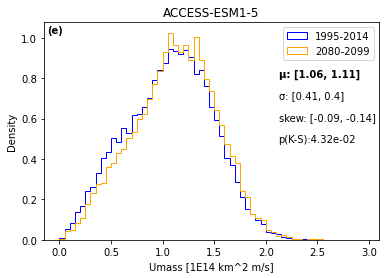

In [29]:
fig, ax = plt.subplots()

ax.hist(data, density=True, bins=binvals, histtype='step', stacked=True, fill=False, color='blue', label='1995-2014')
ax.hist(data2, density=True, bins=binvals, histtype='step', stacked=True, fill=False, color='orange', label='2080-2099')
ax.set_ylabel('Density')
ax.set_xlabel(variable+' '+units)
ax.set_title(modelname)
ax.legend(loc = "upper right")

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }
fontbold = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 10,
        }
mean_present =   str(round(statistics.mean(data),2))
mean_future =   str(round(statistics.mean(data2),2))
sd_present =  str(round(statistics.stdev(data),2))
sd_future =  str(round(statistics.stdev(data2),2))
skew_present =  str(round(scipy.stats.skew(data),2))
skew_future =  str(round(scipy.stats.skew(data2),2))
#pvalue = str(round(KS["pvalue"],3))
pvalue = pvalue = "{:.2e}".format(KS["pvalue"])
print(p)
print(pvalue)

if p <  0.05:
    ax.text(0.70, 0.75, 'μ: ['+ mean_present+', '+mean_future+']', fontdict=fontbold,transform=ax.transAxes) #2.2, 1
    ax.text(0.7, 0.65, 'σ: ['+ sd_present+', '+sd_future+']', fontdict=font,transform=ax.transAxes)
    ax.text(0.7, 0.55, 'skew: ['+ skew_present+', '+skew_future+']', fontdict=font,transform=ax.transAxes)
    ax.text(0.7, 0.45, 'p(K-S):'+ pvalue, fontdict=font,transform=ax.transAxes)
    ax.text(0.01, 0.95,lletra, fontdict=fontbold,transform=ax.transAxes)
else:
    ax.text(0.03, 0.85, 'μ: ['+ mean_present+', '+mean_future+']', fontdict=font,transform=ax.transAxes)#2.2, 1.05
    ax.text(0.03, 0.75, 'σ: ['+ sd_present+', '+sd_future+']', fontdict=font,transform=ax.transAxes)
    ax.text(0.03, 0.65, 'skew: ['+ skew_present+', '+skew_future+']', fontdict=font,transform=ax.transAxes)
    ax.text(0.03, 0.55, 'p(K-S):'+ pvalue, fontdict=font,transform=ax.transAxes)
    ax.text(0.01, 0.95,lletra, fontdict=fontbold,transform=ax.transAxes)
    
plt.show()

In [21]:
np.save(''+variable+'_'+modelname+'_historical.npy', data)
np.save(''+variable+'_'+modelname+'_future.npy', data2)